In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [47]:
im = cv2.imread('./scenery.jpg')
im.shape
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)#changing the image format

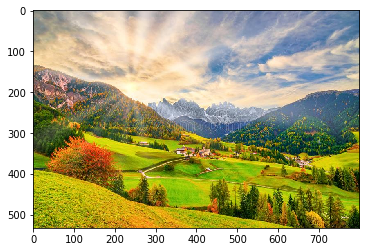

In [48]:
plt.imshow(im)
plt.show()

In [49]:
# Flattening image channel
pixels = im.reshape((-1,3))
pixels.shape

(426400, 3)

In [50]:
from sklearn.cluster import KMeans

In [51]:
model = KMeans(n_clusters=5)
model.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
centers = model.cluster_centers_

In [53]:
centers = np.array(centers,dtype = np.uint8)

## plotting colors

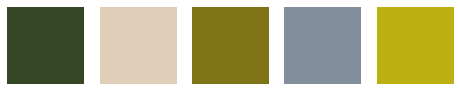

In [55]:
i = 1
plt.figure(0,figsize=(8,6))
color = []
for cen in centers:
    plt.subplot(1,5,i)
    plt.axis('off')
    i += 1
    color.append(cen)
    a = np.zeros((100,100,3),dtype = 'uint8')
    a[:,:,:] = cen
    plt.imshow(a)
plt.show()

## Segmenting our original image

In [68]:
new_img = np.zeros_like(pixels,dtype = 'uint8') 
for ix in range(new_img.shape[0]):
    new_img[ix] = color[model.labels_[ix]]

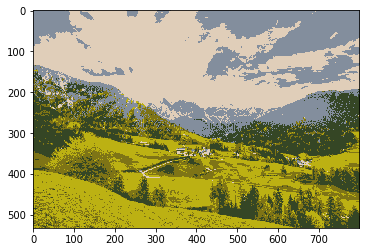

In [71]:
plt.imshow(new_img.reshape(im.shape))

In [79]:
new_img = new_img.reshape(im.shape)
from PIL import Image
final= Image.fromarray(final_image)

In [80]:
with open('output.jpg','wb') as f:
    final.save(f)